In [23]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

**1) O tipo de amostragem consiste em uma amostra estratificada onde foi separado o grupo de alunos de economia nas instituições de ensino no Brasil**

In [24]:
df = pd.read_csv('microdados_enade_2018econ.csv', sep=';', encoding='utf-8', encoding_errors='ignore')

In [25]:
df.shape

(9582, 137)

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df['Co Uf Curso'].unique()

array([14, 23, 26, 42, 28, 27, 35, 31, 15, 12, 43, 52, 51, 22, 33, 41, 13,
       24, 25, 29, 53, 50, 32, 17, 21], dtype=int64)

In [28]:
len(df['Co Uf Curso'].unique())

25

In [29]:
25/27 * 100

92.5925925925926

**2) Os dados tem registros de 25 estados entre 27 possiveis tendo 92,59% de abrangecia territorial**

In [30]:
df['Co Uf Curso'].value_counts()

35    2691
33    1263
31     849
41     793
43     593
26     481
23     475
42     382
29     298
52     212
24     180
13     179
15     145
53     139
27     125
21     120
25     112
22     109
51      81
50      79
32      79
28      78
12      31
14      29
17      20
Name: Co Uf Curso, dtype: int64

**- O estado 17 é o com menor representatividade com 20 aparições**

In [31]:
df['Co Munic Curso'].value_counts()

3550308    1207
3304557     625
3509502     474
3106200     301
2611606     268
           ... 
1504208      11
4304606       9
4204202       9
4119608       7
3113404       4
Name: Co Munic Curso, Length: 117, dtype: int64

**- Municipio com menor representativade é o 3113404 com 4 aparições**

In [32]:
df['Co Ies'].value_counts()

546     375
572     342
580     288
746     285
574     249
       ... 
417       2
234       1
197       1
1872      1
1772      1
Name: Co Ies, Length: 160, dtype: int64

**- Os IES com as menores representativades são os 1772, 1872, 197, 234 com 1 aparição cada**

In [33]:
df.shape

(9543, 137)

Temos 9582 Registros

In [34]:
df['Co Grupo'].value_counts()

13    9543
Name: Co Grupo, dtype: int64

Todos os registros são do Curso de Economia

In [35]:
len(df['Co Ies'].unique())

160

**4) Temos 160 IES diferentes**

In [36]:
len(df.drop_duplicates())

9543

**5) Temos 9543 Alunos diferentes**

# Quantidade de Cursos

In [37]:
len(df['Co Curso'].unique())

195

**6) Temos 195 Cursos Diferentes**

# Cursos Publicos e Privados

In [38]:
publico_privado = df[['Co Curso', 'Co Categad']]

In [39]:
publico_privado = publico_privado.groupby(by='Co Curso')['Co Categad'].mean().to_frame()
publico_privado['Co Categad'] = publico_privado['Co Categad'].astype(int)

In [40]:
publico_privado['Co Categad'].value_counts()

10002    53
10008    43
10005    29
115      17
10001    15
93        9
118       9
10007     6
121       5
116       3
10003     3
10009     1
17634     1
120       1
Name: Co Categad, dtype: int64

In [41]:
publico = (publico_privado['Co Categad'] == 17634) | (publico_privado['Co Categad'] == 93) | (publico_privado['Co Categad'] == 115) | \
 (publico_privado['Co Categad'] == 116) | (publico_privado['Co Categad'] == 10001) | (publico_privado['Co Categad'] == 10002) | \
 (publico_privado['Co Categad'] == 10002) | (publico_privado['Co Categad'] == 10003) 

In [42]:
len(publico_privado[publico])

101

In [43]:
# explode = [0.03,0] # To slice the perticuler section
# colors = ['g','r'] # Color of each section
# textprops = {"fontsize":15} # Font size of text in pie chart
 
# plt.pie(valores, labels = classes,explode = explode,colors =colors,autopct = "%0.2f%%",radius = 1.4,startangle = 270, textprops =textprops) 
 
# plt.savefig("publico_privado.png")
# plt.show() # To show pie chart only

**7) Temos 101 Cursos de Categoria Publica e 94 de Categoria Privada**

# Cursos Noturnos, Diurnos e Integrais

In [44]:
cursos = list(df['Co Curso'].unique())

In [45]:
noturno = df[(df['Co Curso'].isin(cursos)) & (df['Co Turno Graduacao'] == 4)]
noturno = noturno[['Co Curso','Co Turno Graduacao']]

In [46]:
len(noturno['Co Curso'].unique())

164

In [47]:
integral = df[(df['Co Curso'].isin(cursos)) & (df['Co Turno Graduacao'] == 3)]
integral = integral[['Co Curso','Co Turno Graduacao']]

In [48]:
integral.drop_duplicates(inplace=True)

In [49]:
len(integral['Co Curso'].unique())

37

In [50]:
manha = df[(df['Co Curso'].isin(cursos)) & (df['Co Turno Graduacao'] == 1)]
tarde = df[(df['Co Curso'].isin(cursos)) & (df['Co Turno Graduacao'] == 2)]

diurno = pd.concat([manha, tarde], ignore_index=True)
diurno = diurno[['Co Curso','Co Turno Graduacao']]

In [51]:
diurno.drop_duplicates(inplace=True)

In [52]:
len(diurno['Co Curso'].unique())

50

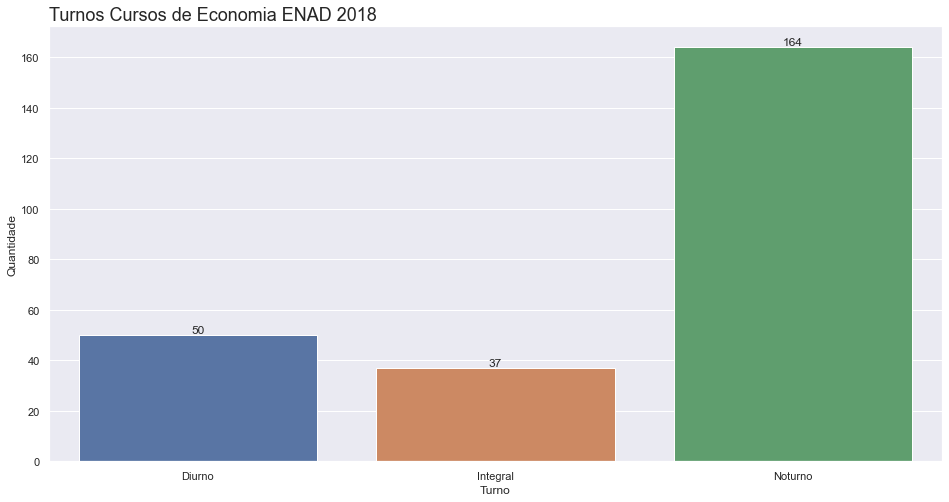

In [53]:
classes = ['Diurno', 'Integral', 'Noturno']
valores = [50, 37, 164]

sns.set_theme(style='darkgrid')

ax = plt.subplots(figsize=(16, 8))
ax = sns.barplot(x=classes, y=valores)
ax.bar_label(ax.containers[0])
ax.set_title('Turnos Cursos de Economia ENAD 2018', loc='Left', fontsize=18)
ax.set_xlabel('Turno')
ax.set_ylabel('Quantidade')

plt.savefig("turnos.png")
plt.show()

# Presencial - Distância

In [54]:
presencial = df[(df['Co Curso'].isin(cursos)) & (df['Co Modalidade'] == 1)]
presencial = presencial[['Co Curso','Co Modalidade']]
presencial.drop_duplicates(inplace=True)
len(presencial['Co Curso'].unique())

187

In [55]:
dist = df[(df['Co Curso'].isin(cursos)) & (df['Co Modalidade'] == 2)]
dist = dist[['Co Curso','Co Modalidade']]
dist.drop_duplicates(inplace=True)
len(dist['Co Curso'].unique())

8

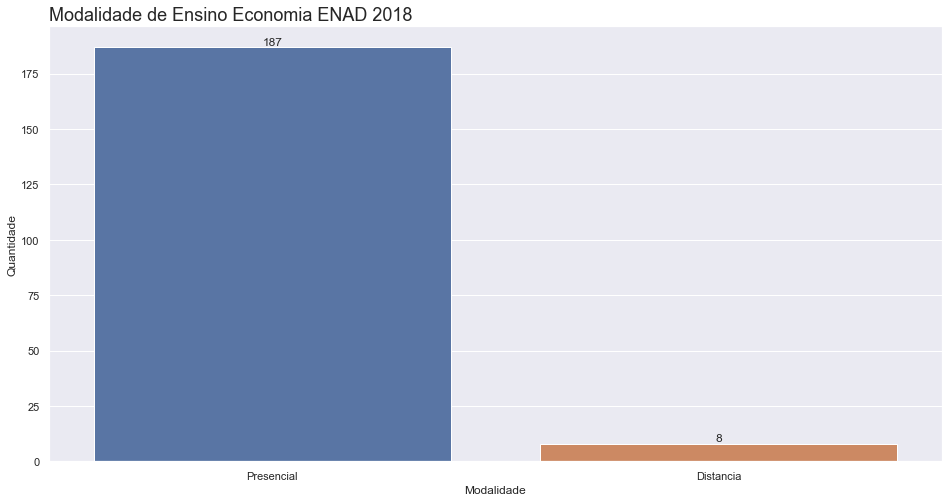

In [78]:
classes = ['Presencial', 'Distancia']
valores = [187, 8]

sns.set_theme(style='darkgrid')

ax = plt.subplots(figsize=(16, 8))
ax = sns.barplot(x=classes, y=valores)
ax.bar_label(ax.containers[0])
ax.set_title('Modalidade de Ensino Economia ENAD 2018', loc='Left', fontsize=18)
ax.set_xlabel('Modalidade')
ax.set_ylabel('Quantidade')

plt.savefig("modalidade.png")
plt.show()

In [56]:
df['Nt Ger'].info()

<class 'pandas.core.series.Series'>
Int64Index: 9543 entries, 0 to 9581
Series name: Nt Ger
Non-Null Count  Dtype 
--------------  ----- 
8073 non-null   object
dtypes: object(1)
memory usage: 149.1+ KB


In [57]:
df['Nt Ger'] = df['Nt Ger'].replace(',','.', regex=True)

In [58]:
df['Nt Ger'] = df['Nt Ger'].astype(float)

In [59]:
df['Nt Ger'].mean()

38.39742351046704

In [60]:
df['Nt Ger'].median()

37.2

In [61]:
df['Nt Ger'].std()

13.137758259020998

In [62]:
df['Nt Ger'].var()

172.60069207247443

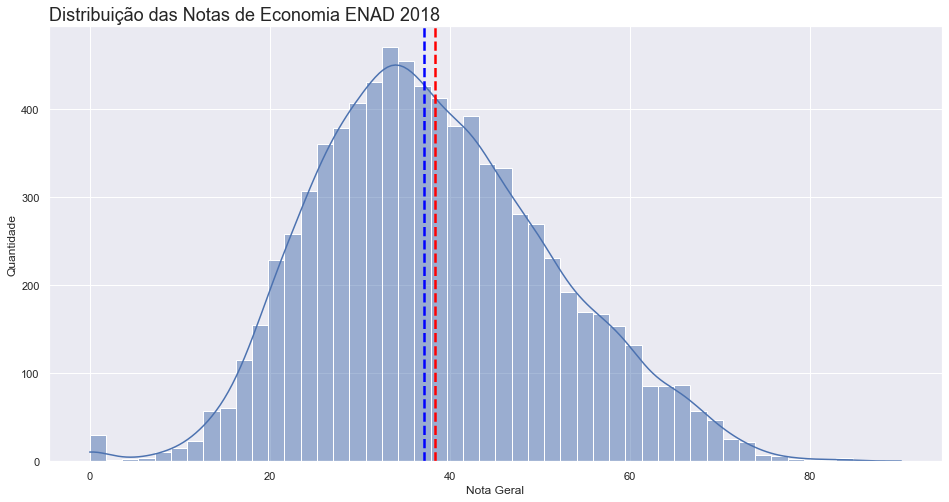

In [63]:
sns.set_theme(style='darkgrid')

ax = plt.subplots(figsize=(16, 8))
ax = sns.histplot(df['Nt Ger'], kde=True)

ax.set_title('Distribuição das Notas de Economia ENAD 2018', loc='Left', fontsize=18)
ax.set_xlabel('Nota Geral')
ax.set_ylabel('Quantidade')

plt.axvline(x=df['Nt Ger'].mean(),color='red',ls='--',lw=2.5)
plt.axvline(x=df['Nt Ger'].median(),color='blue',ls='--',lw=2.5)


plt.savefig("dist_nota_geral.png")
plt.show()

# Notas da federal

In [64]:
federal = df[(df['Co Categad'] == 93) | (df['Co Categad'] == 10002)]
federal.shape

(4190, 137)

In [65]:
federal['Nt Ger'].mean()

39.7765863119978

In [66]:
federal['Nt Ger'].median()

38.7

In [86]:
((39.77/38.39) - 1) * 100

3.5946861161761046

In [88]:
((38.7/37.2)-1)*100

4.0322580645161255

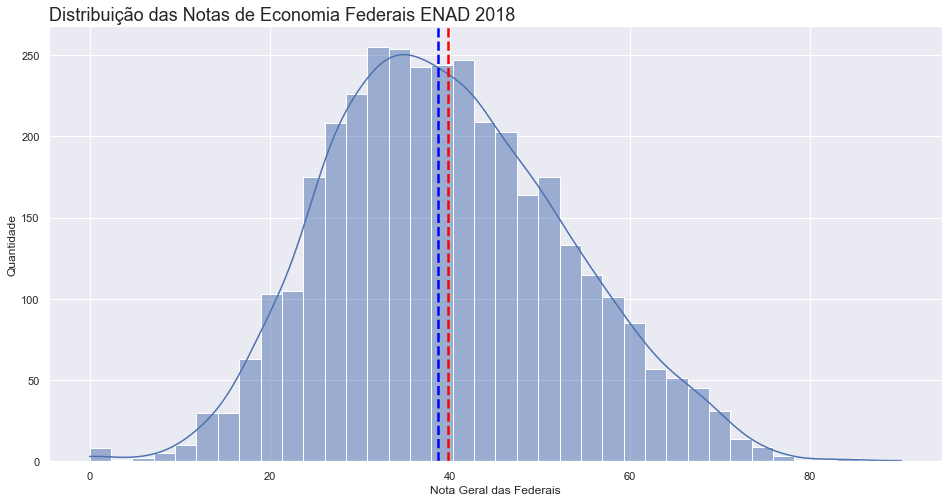

In [79]:
sns.set_theme(style='darkgrid')

ax = plt.subplots(figsize=(16, 8))
ax = sns.histplot(federal['Nt Ger'], kde=True)

ax.set_title('Distribuição das Notas de Economia Federais ENAD 2018', loc='Left', fontsize=18)
ax.set_xlabel('Nota Geral das Federais')
ax.set_ylabel('Quantidade')

plt.axvline(x=federal['Nt Ger'].mean(),color='red',ls='--',lw=2.5)
plt.axvline(x=federal['Nt Ger'].median(),color='blue',ls='--',lw=2.5)

plt.savefig("dist_federais.png")

plt.show()

In [68]:
ufpr1 = df[(df['Co Uf Curso'] == 41) & (df['Co Categad'] == 93)]
ufpr2 = df[(df['Co Uf Curso'] == 41) & (df['Co Categad'] == 10002)]

ufpr = pd.concat([ufpr1,ufpr2], ignore_index=True)

ufpr.shape

(169, 137)

In [69]:
ufpr['Nt Ger'].mean()

35.3763888888889

In [70]:
ufpr['Nt Ger'].median()

34.349999999999994

In [89]:
((35.37/39.77)-1)*100

-11.0636157907971

In [90]:

((34.34/38.7)-1)*100

-11.266149870801033

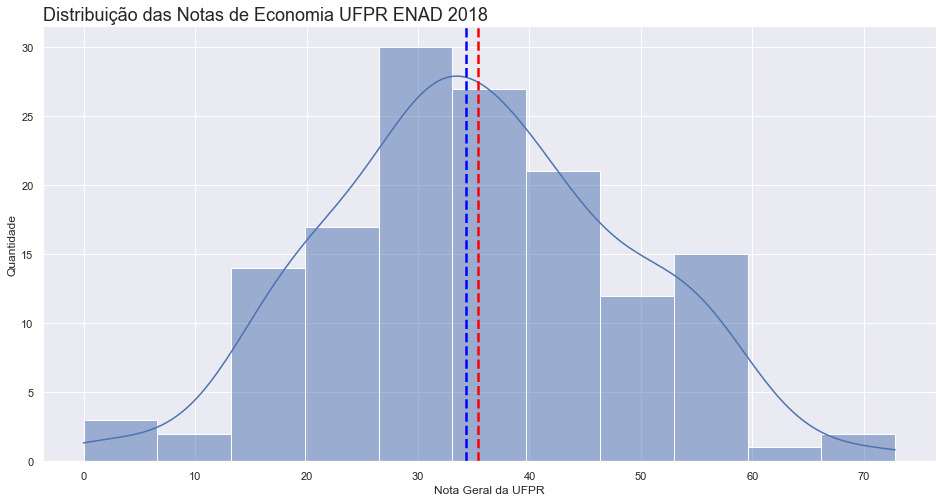

In [91]:
sns.set_theme(style='darkgrid')

ax = plt.subplots(figsize=(16, 8))
ax = sns.histplot(ufpr['Nt Ger'], kde=True)

ax.set_title('Distribuição das Notas de Economia UFPR ENAD 2018', loc='Left', fontsize=18)
ax.set_xlabel('Nota Geral da UFPR')
ax.set_ylabel('Quantidade')

plt.axvline(x=ufpr['Nt Ger'].mean(),color='red',ls='--',lw=2.5)
plt.axvline(x=ufpr['Nt Ger'].median(),color='blue',ls='--',lw=2.5)

plt.savefig("ufpr.png")

plt.show()

In [72]:
df['Qe I04'].info()

<class 'pandas.core.series.Series'>
Int64Index: 9543 entries, 0 to 9581
Series name: Qe I04
Non-Null Count  Dtype 
--------------  ----- 
8495 non-null   object
dtypes: object(1)
memory usage: 149.1+ KB


In [73]:
escolaridade = df['Qe I04'].value_counts().to_frame()
escolaridade['Escolaridade'] = ['Médio', 'Graduação', 'Fundamental 1', 'Fundamental 2', 'Pós', 'Nenhuma']
escolaridade.sort_index(inplace=True)
escolaridade

,Qe I04,Escolaridade
A,655,Nenhuma
B,1527,Fundamental 1
C,1045,Fundamental 2
D,2679,Médio
E,1644,Graduação
F,945,Pós


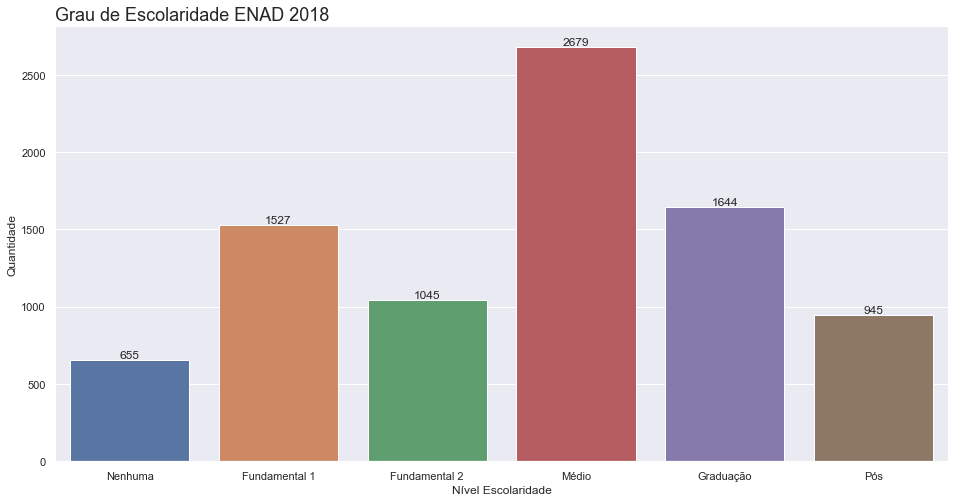

In [93]:
sns.set_theme(style='darkgrid')

ax = plt.subplots(figsize=(16, 8))
ax = sns.barplot(data=escolaridade, x='Escolaridade', y='Qe I04')

ax.set_title('Grau de Escolaridade ENAD 2018', loc='Left', fontsize=18)
ax.bar_label(ax.containers[0])
ax.set_xlabel('Nível Escolaridade')
ax.set_ylabel('Quantidade')

plt.savefig("moda.png")

plt.show()

In [75]:
df['Tp Sexo'].value_counts()

M    5766
F    3777
Name: Tp Sexo, dtype: int64

In [76]:
df['Tp Sexo'].value_counts(normalize=True)

M    0.604213
F    0.395787
Name: Tp Sexo, dtype: float64

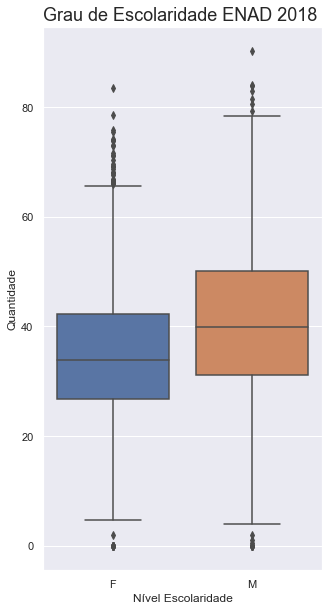

In [77]:
sns.set_theme(style='darkgrid')

ax = plt.subplots(figsize=(5, 10))
ax = sns.boxplot(data=df, x='Tp Sexo', y='Nt Ger')

ax.set_title('Grau de Escolaridade ENAD 2018', loc='Left', fontsize=18)
ax.set_xlabel('Nível Escolaridade')
ax.set_ylabel('Quantidade')

plt.show()